## Import All Modules & Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Project Level 1: Data Analysis   

## Overview  
#### In this project, we will perform four key tasks related to restaurant data analysis. Each task will involve data processing, visualization, and insights generation.

## Tasks to Perform  
1  **Top Cuisines**  
2  **City Analysis**  
3  **Price Range Distribution**  
4  **Online Distribution** 

In [4]:
# Import Data by using read.csv

df = pd.read_csv('Dataset.csv')

In [5]:
# Find the Shape of data( No of rows and colums)

print(df.shape)

(9551, 21)


In [6]:
# Difine the Column Names

print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
# Difine the Data ( Datatype, Columns, Nullvalues)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Top Cuisines

### (1) Determine the top 3 most common Cuisines in the dataset

In [8]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [9]:
cuisine_count = df['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print('type_of_cuisines & count:', cuisine_count)
Unique_cuisine = df['Cuisines'].str.split(', ').explode('Cuisines').str.strip().unique()
print('total_count:-', len(Unique_cuisine))
print(Unique_cuisine)

type_of_cuisines & count: Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
total_count:- 146
['French' 'Japanese' 'Desserts' 'Seafood' 'Asian' 'Filipino' 'Indian'
 'Sushi' 'Korean' 'Chinese' 'European' 'Mexican' 'American' 'Ice Cream'
 'Cafe' 'Italian' 'Pizza' 'Bakery' 'Mediterranean' 'Fast Food' 'Brazilian'
 'Arabian' 'Bar Food' 'Grill' 'International' 'Peruvian' 'Latin American'
 'Burger' 'Juices' 'Healthy Food' 'Beverages' 'Lebanese' 'Sandwich'
 'Steak' 'BBQ' 'Gourmet Fast Food' 'Mineira' 'North Eastern' nan
 'Coffee and Tea' 'Vegetarian' 'Tapas' 'Breakfast' 'Diner' 'Southern'
 'Southwestern' 'Spanish' 'Argentine' 'Caribbean' 'German' 'Vietnamese'
 'Thai' 'Modern Australian' 'Teriyaki' 'Cajun' 'Canadian' 'Tex-Mex'
 'Middle Eastern' 'Gr

In [10]:
df['Cuisines'].mode()[0]

'North Indian'

In [11]:
top_cuisine=cuisine_count.head(3)
print('Top 3 common Cuisines', top_cuisine)

Top 3 common Cuisines Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


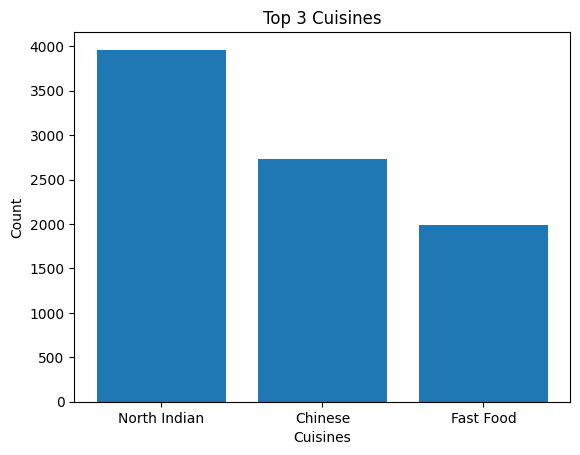

In [12]:
plt.bar(top_cuisine.index, top_cuisine.values)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 3 Cuisines')
plt.show()

## Task 1: Top Cuisines

### (2) Calculate the percentage of Restaurants that serve each top cuisines.

In [13]:
no_of_restaurants = len(df)
print('Total Restaurants:', no_of_restaurants)

Total Restaurants: 9551


In [14]:
top_cuisine5=cuisine_count.head()
percentage = (top_cuisine5/no_of_restaurants)*100
print('Top 5 Cuisines and their Percentage Share of Restaurants')
print(percentage)

Top 5 Cuisines and their Percentage Share of Restaurants
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


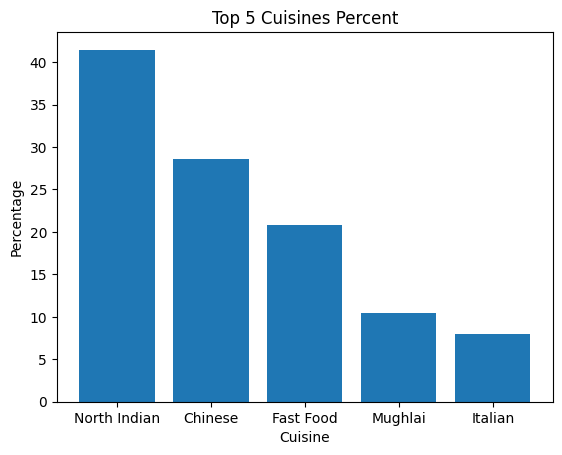

In [15]:
plt.bar(top_cuisine5.index, percentage.values)
plt.xlabel('Cuisine')
plt.ylabel('Percentage')
plt.title('Top 5 Cuisines Percent')
plt.show()

## Task 2: City Analysis

### (1) Identify the city with the highest no of restaurant in trthe dataset.

In [16]:
city_counts = df['City'].value_counts()
print(city_counts.head(1))

City
New Delhi    5473
Name: count, dtype: int64


In [17]:
print('City has Highest No of Restaurant:', city_counts.idxmax())

City has Highest No of Restaurant: New Delhi


## Task 2: City Analysis

### (2) Calculate the avg rating of restaurant in each city.

In [18]:
restaurant_rating_by_city = df.groupby('City')['Aggregate rating'].mean()
print('Avg Rating of each City', restaurant_rating_by_city)

Avg Rating of each City City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


## Task 2: City Analysis

### (3) Determine the City with the highest avg rating.

In [19]:
print(restaurant_rating_by_city.idxmax())
print(restaurant_rating_by_city.max())

Inner City
4.9


## Task 3: Price Range Distribution

### (1) Create a histogram or bar chart to visualize the distribution of price ranges among the reasurants.

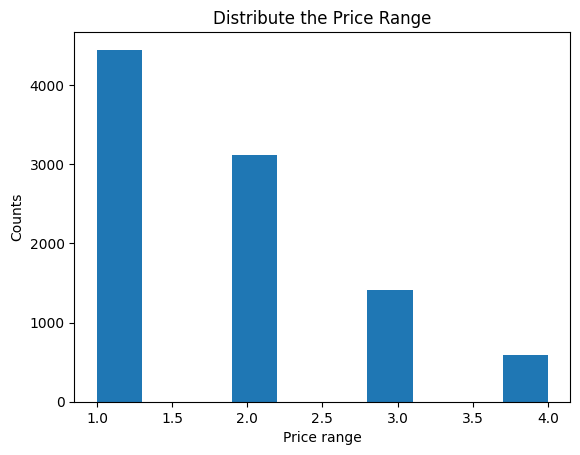

In [20]:
plt.hist(df['Price range'])
plt.xlabel('Price range')
plt.ylabel('Counts')
plt.title('Distribute the Price Range')
plt.show()

## Task 3: Price Range Distribution

### (2) Calculate the percentage of restaurants in each city price range category.

In [31]:
price_range_count=df['Price range'].value_counts()
price_range_percentage = (price_range_count / len(df) * 100,2)
print(price_range_count, price_range_percentage)

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64 (Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64, 2)


## Task 4: Online Delivery

### (1) Determine the Percentage of Restaurants that offer online delivery.

In [22]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)
print('No of Restaurant Provide Online delivery:', online_delivery)

No of Restaurant Provide Online delivery: 2451


In [23]:
offline_delivery = df['Has Online delivery'].value_counts().get('No',0)
print('No of Restaurant Provide offline delivery:', offline_delivery)

No of Restaurant Provide offline delivery: 7100


In [24]:
percentage_onlinedelivery = round(online_delivery/len(df)*100,1)
print('Percentage of restaurant provide online servise:-', percentage_onlinedelivery)

Percentage of restaurant provide online servise:- 25.7


In [25]:
percentage_offlinedelivery = round(offline_delivery/len(df)*100,1)
print('Percentage of restaurant provide offline servise:-',percentage_offlinedelivery)

Percentage of restaurant provide offline servise:- 74.3


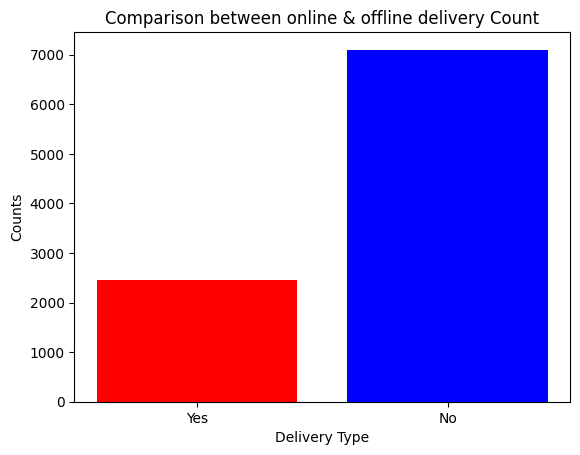

In [32]:
lables = ['Yes', 'No']
count_delivery = [online_delivery,offline_delivery]
colors='red', 'blue'
plt.bar(lables, count_delivery, color=colors)
plt.xlabel('Delivery Type')
plt.ylabel('Counts')
plt.title('Comparison between online & offline delivery Count')
plt.show()

## Task 4: Online Delivery

### (2) Compare the Online rating of restaurant with and without online delivery.

In [26]:
avg_ratingforYes = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),1)   
print('Avg rating of online delivery restaurants:-', avg_ratingforYes)

Avg rating of online delivery restaurants:- 3.2


In [27]:
avg_ratingforNo = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),1)   
print('Avg rating of offline delivery restaurants:-', avg_ratingforNo)

Avg rating of offline delivery restaurants:- 2.5


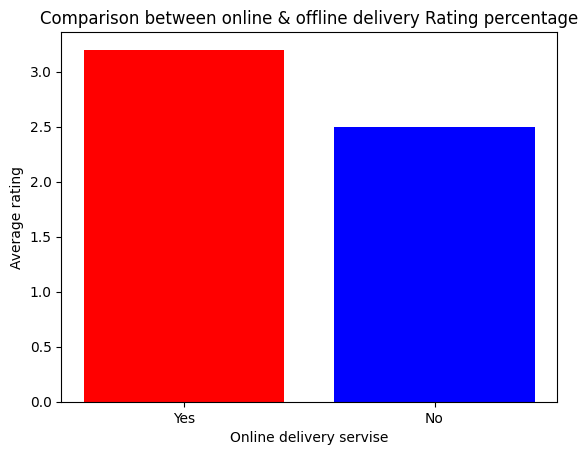

In [28]:
lables = ['Yes', 'No']
average_rating = [avg_ratingforYes,avg_ratingforNo]
colors='red', 'blue'
plt.bar(lables, average_rating, color=colors)
plt.xlabel('Online delivery servise')
plt.ylabel('Average rating')
plt.title('Comparison between online & offline delivery Rating percentage')
plt.show()